In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_selection import chi2
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

import seaborn as sns

In [2]:
df = pd.read_csv('final_raw.csv')
df.head()

,Title,Artist,Featuring,Featured_Artist,Lyrics,Tags,Genre,Nouns,Verbs,Adjectives,...,Character_Count,Noun_Count,Verb_Count,Adjective_Count,Adverb_Count,TTR,Valence_Pos,Valence_Neg,Valence_Neu,Valence_Compound
0,Bridge Over Troubled Water,Simon & Garfunkel,0,Simon & Garfunkel,When you're weary Feeling small When tears ar...,"folk,classic rock,oldies",rock,darkness way water mind times friends evening ...,comfort take sailing need See is found Feeling...,rough troubled weary small,...,804,17,20,4,9,48.52,0.153,0.157,0.689,-0.1965
1,American Woman,The Guess Who,0,The Guess Who,American woman gonna mess your mind American ...,"classic rock,70s,rock",rock,scenes M ghetto shadow E face mama time things...,know got need hypnotize 're leave see say Gon ...,mmm American Coloured old good important,...,1567,22,28,6,6,26.56,0.034,0.110,0.856,-0.9465
2,War,Edwin Starr,0,Edwin Starr,"(War, huh) Yeah! (What is it good for?) Absol...","r&b,r&b,motown",r&b,sons thought mankind tears unrest mind Friend ...,mean got take blows Made is knows despise lose...,bitter short ooohhh disabled young Good many b...,...,1912,33,29,13,9,30.02,0.229,0.275,0.496,-0.9869
3,Ain't No Mountain High Enough,Diana Ross,0,Diana Ross,"If you need me, call me No matter where you a...","r&b,motown,70s",r&b,darling river sun thought goal company need va...,know put need feel 're holds call stop used se...,low able free old high alive wide more,...,1568,32,37,8,23,42.19,0.187,0.067,0.746,0.9928
4,I'll Be There,The Jackson 5,0,The Jackson 5,"You and I must make a pact, we must bring sal...","motown,r&b,70s",r&b,world heart joy laughter name baby shoulders s...,comfort know need is find found make call brin...,strong glad good unselfish new,...,1194,15,23,5,10,32.34,0.320,0.000,0.680,0.9983


In [7]:
X = df.iloc[:,4].values.astype('U')
for i in range(df.count()['Title']):
    X[i] = str.lower(X[i])

In [8]:
y_output = []
for item in df['Genre'] :
    if item == 'rock' : 
        y_output.append(0)
    elif item == 'r&b' :
        y_output.append(1)
    elif item == 'blues' :
        y_output.append(2)
    elif item == 'country' :
        y_output.append(3)
    elif item == 'edm' :
        y_output.append(4) 
    elif item == 'rap' :
        y_output.append(5)
    elif item == 'pop' :
        y_output.append(6)

In [9]:
d = {'Genre' : df['Genre'] , 'Lyrics' : X , 'Genre_ID' : y_output}
df2 = pd.DataFrame(data = d)

In [10]:
df2.head()

,Genre,Lyrics,Genre_ID
0,rock,when you're weary feeling small when tears ar...,0
1,rock,american woman gonna mess your mind american ...,0
2,r&b,"(war, huh) yeah! (what is it good for?) absol...",1
3,r&b,"if you need me, call me no matter where you a...",1
4,r&b,"you and i must make a pact, we must bring sal...",1


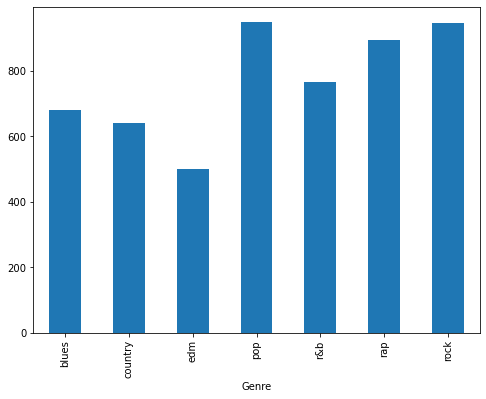

In [11]:
fig = plt.figure(figsize=(8,6))
df2.groupby('Genre').Lyrics.count().plot.bar(ylim=0)
plt.show()

In [56]:
tfidf_uni_bi = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf1 = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 1))
tfidf2 = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 1))
tfidf3 = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 1))
tfidf4 = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 1))

In [92]:
Bigram_Unigram_importance = tfidf_uni_bi.fit_transform(df2.Lyrics).toarray()
Noun_importance =  tfidf1.fit_transform(df.Nouns.astype('U')).toarray()
Verbs_importance = tfidf2.fit_transform(df.Verbs.astype('U')).toarray()
Adjectives_importance = tfidf3.fit_transform(df.Adjectives.astype('U')).toarray()
Adverbs_importance = tfidf4.fit_transform(df.Adverbs.astype('U')).toarray()
features = np.column_stack((Bigram_Unigram_importance,Noun_importance,Verbs_importance,Adjectives_importance,Adverbs_importance , df.Noun_Count , df.Verb_Count ,  df.Adjective_Count , df.Adverb_Count , df.Lyric_Count , df.Character_Count , df.TTR , df.Valence_Compound ))
labels = df2.Genre_ID
features.shape

(5373, 30161)

In [97]:
tfidf_feature_names = tfidf1.get_feature_names() + tfidf2.get_feature_names() + tfidf3.get_feature_names() + tfidf4.get_feature_names() + tfidf_uni_bi.get_feature_names() + ['Noun Count' , 'Verb Count' , 'Adjective Count' , 'Adverb Count' , 'Lyric Count' , 'Character Count' , 'TTR' , 'Valence']

In [99]:
N = 2
for genre , genre_id in zip(list(df2['Genre'].drop_duplicates()) , list(df2['Genre_ID'].drop_duplicates()) ):
    features_chi2 = chi2(features, labels == genre_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_feature_names)[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(genre))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

ValueError: Input X must be non-negative.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df2['Lyrics'], df2['Genre'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

## Cross Val

In [36]:
#from sklearn.model_selection import GridSearchCV

In [ ]:
#parameters = {'n_estimators' : [int((len(X)+5)/10*i) for i in range(1,10)] }
#rfc = RandomForestClassifier()

#CV_rfc = GridSearchCV(estimator=rfc, param_grid=parameters, cv= 10)
#CV_rfc.fit(X_train_tfidf, y_train)

In [40]:
#parameters = {'C' : [1e-5 , 1e-3 , 1e-1 , 1 , 10 , 100 , 1000] }
#lin_svc = LinearSVC()

#CV_lin_svc = GridSearchCV(estimator=lin_svc, param_grid=parameters, cv= 10)
#CV_lin_svc.fit(X_train_tfidf, y_train)

/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=10, estimator=LinearSVC(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1, 10, 100, 1000]})

In [58]:
#parameters = {'C' : [1e-5 , 1e-3 , 1e-1 , 1 , 10 , 100 , 1000] }
#log_reg = LogisticRegression()

#CV_log_reg = GridSearchCV(estimator=log_reg, param_grid=parameters, cv= 10)
#CV_log_reg.fit(X_train_tfidf, y_train)
#print(CV_log_reg.best_estimator_)

/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

LogisticRegression(C=1)


/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: Con

/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py", line 641, in fit
    self._count(X, Y)
  File "/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py", line 763, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 1047, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to Multin

/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

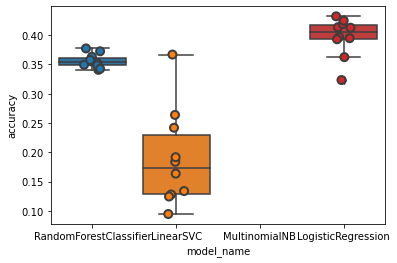

In [100]:
models = [
    RandomForestClassifier(n_estimators=500, max_depth=3, random_state=0),
    LinearSVC(C=0.1 , max_iter=1000),
    MultinomialNB(),
    LogisticRegression(C=1 , max_iter=1000),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [101]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.189464
LogisticRegression        0.397188
MultinomialNB                  NaN
RandomForestClassifier    0.355851
Name: accuracy, dtype: float64

/Users/barryryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


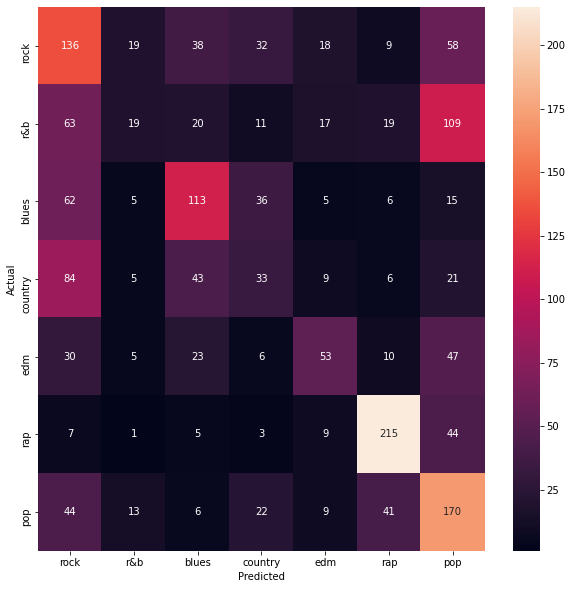

In [103]:
model = LogisticRegression(C = 1 , max_iter=1000)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=list(df2['Genre'].drop_duplicates()), yticklabels=list(df2['Genre'].drop_duplicates()))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [105]:
importance = sorted(model.coef_[0])[-20:]
np.where(model.coef_[0] == importance[0])

(array([26370]),)

In [106]:
tfidf_feature_names[26370]

'swirl'

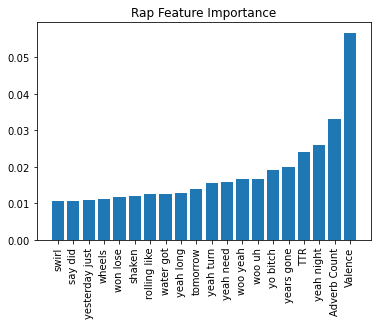

In [116]:
importance = sorted(model.coef_[0])[-20:]
label_rock = []
for item in importance : 
    idx = np.where(model.coef_[0] == item)
    label_rock.append(tfidf_feature_names[idx[0][0]])
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))] , label_rock, rotation='vertical')
plt.title('Rap Feature Importance')
plt.show()

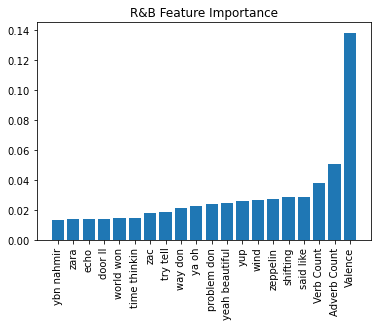

In [117]:
importance = sorted(model.coef_[1])[-20:]
label_rock = []
for item in importance : 
    idx = np.where(model.coef_[1] == item)
    label_rock.append(tfidf_feature_names[idx[0][0]])
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))] , label_rock, rotation='vertical')
plt.title('R&B Feature Importance')
plt.show()

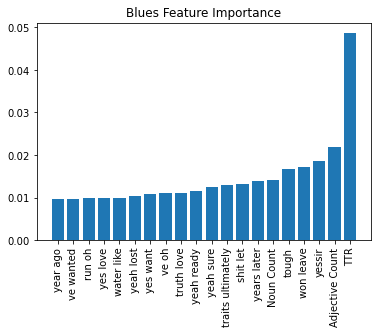

In [119]:
importance = sorted(model.coef_[2])[-20:]
label_rock = []
for item in importance : 
    idx = np.where(model.coef_[2] == item)
    label_rock.append(tfidf_feature_names[idx[0][0]])
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))] , label_rock, rotation='vertical')
plt.title('Blues Feature Importance')
plt.show()

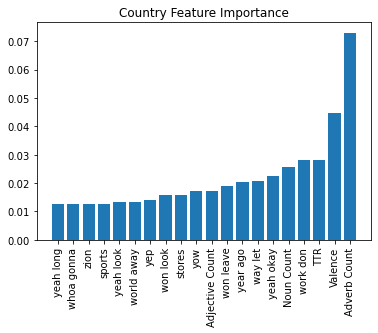

In [120]:
importance = sorted(model.coef_[3])[-20:]
label_rock = []
for item in importance : 
    idx = np.where(model.coef_[3] == item)
    label_rock.append(tfidf_feature_names[idx[0][0]])
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))] , label_rock, rotation='vertical')
plt.title('Country Feature Importance')
plt.show()

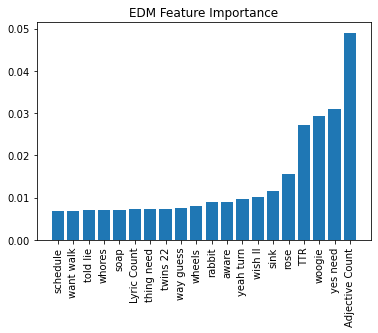

In [121]:
importance = sorted(model.coef_[4])[-20:]
label_rock = []
for item in importance : 
    idx = np.where(model.coef_[4] == item)
    label_rock.append(tfidf_feature_names[idx[0][0]])
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))] , label_rock, rotation='vertical')
plt.title('EDM Feature Importance')
plt.show()

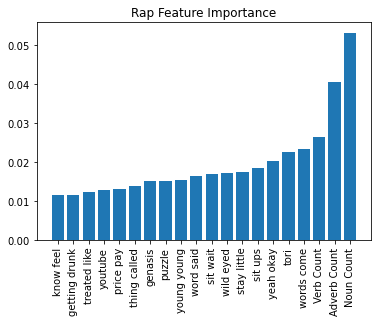

In [122]:
importance = sorted(model.coef_[5])[-20:]
label_rock = []
for item in importance : 
    idx = np.where(model.coef_[5] == item)
    label_rock.append(tfidf_feature_names[idx[0][0]])
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))] , label_rock, rotation='vertical')
plt.title('Rap Feature Importance')
plt.show()

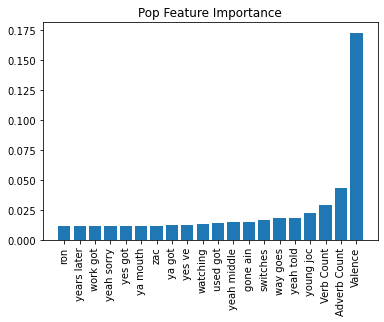

In [123]:
importance = sorted(model.coef_[6])[-20:]
label_rock = []
for item in importance : 
    idx = np.where(model.coef_[6] == item)
    label_rock.append(tfidf_feature_names[idx[0][0]])
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))] , label_rock, rotation='vertical')
plt.title('Pop Feature Importance')
plt.show()

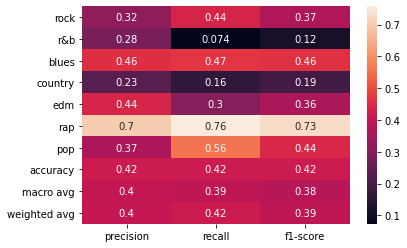

In [124]:
from sklearn import metrics
clf_report = metrics.classification_report(y_test, y_pred, target_names=df['Genre'].unique() , output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)